In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#data set from : http://aqicn.org/data-platform/register/
csv_path='wuhan-air-quality.csv'
df=pd.read_csv(csv_path)
df.head(50)

,date,pm25,pm10,o3,no2,so2,co
0,2021/3/1,64,35,33,18,6,11
1,2021/3/2,105,50,25,24,6,9
2,2021/3/3,128,55,44,22,4,9
3,2021/3/4,132,42,22,20,4,10
4,2021/3/5,101,29,15,19,2,7
5,2021/3/6,78,60,14,16,2,7
6,2021/3/7,142,65,13,25,3,9
7,2021/3/8,157,49,28,21,3,6
8,2021/3/9,128,48,20,26,3,9
9,2021/3/10,108,33,24,23,2,8


In [3]:
df.columns


Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [4]:
df['date']=pd.to_datetime(df.date)
df['date']

0      2021-03-01
1      2021-03-02
2      2021-03-03
3      2021-03-04
4      2021-03-05
          ...    
2480   2017-01-01
2481   2016-01-03
2482   2014-12-31
2483   2014-05-03
2484   2013-12-31
Name: date, Length: 2485, dtype: datetime64[ns]

In [5]:
# melbourne lockdown time is 111 days from 7-7-2020 to 10-27-2020
df_lockdown=df.loc[(df['date']>'2020-1-23')&(df['date']<'2020-4-8')]
df_lockdown.head()

,date,pm25,pm10,o3,no2,so2,co
260,2020-04-01,101,46,45,13,3,8
261,2020-04-02,119,62,43,15,4,9
262,2020-04-03,156,60,61,18,5,10
263,2020-04-04,150,64,85,19,4,9
264,2020-04-05,151,55,52,17,5,7


In [6]:
#sort values by date
df_lockdown=df_lockdown.sort_values(by='date')
df_lockdown.head()

,date,pm25,pm10,o3,no2,so2,co
350,2020-01-24,116,46,22,6,2,7
351,2020-01-25,131,32,31,5,2,5
352,2020-01-26,104,45,28,6,2,8
353,2020-01-27,137,55,33,9,2,6
354,2020-01-28,154,54,35,15,4,7


In [7]:
# fill all the empty 'space' with "0"
df_lockdown.replace(' ',"0", inplace=True)
df_lockdown

,date,pm25,pm10,o3,no2,so2,co
350,2020-01-24,116,46,22,6,2,7
351,2020-01-25,131,32,31,5,2,5
352,2020-01-26,104,45,28,6,2,8
353,2020-01-27,137,55,33,9,2,6
354,2020-01-28,154,54,35,15,4,7
...,...,...,...,...,...,...,...
262,2020-04-03,156,60,61,18,5,10
263,2020-04-04,150,64,85,19,4,9
264,2020-04-05,151,55,52,17,5,7
265,2020-04-06,100,55,62,23,6,8


In [8]:
# melbourne non-lockdown time is 111 days from 7-7-2019 to 10-27-2019
non_lockdown=df.loc[(df['date']>'2019-10-17')&(df['date']<'2020-1-1')]
non_lockdown=non_lockdown.sort_values(by='date')
non_lockdown.head()
non_lockdown.replace(' ',"0", inplace=True)
non_lockdown


,date,pm25,pm10,o3,no2,so2,co
433,2019-10-18,115,55,69,41,4,11
434,2019-10-19,133,63,69,48,6,12
435,2019-10-20,143,66,76,50,6,13
436,2019-10-21,144,60,39,30,6,11
437,2019-10-22,137,48,47,24,5,14
...,...,...,...,...,...,...,...
502,2019-12-26,151,82,20,33,5,12
503,2019-12-27,169,87,5,39,13,15
504,2019-12-28,167,61,16,28,4,10
505,2019-12-29,150,0,0,0,0,0


Text(0.5, 1.0, 'comparison of melbourne pm2.5 values lockdown vs nonlock')

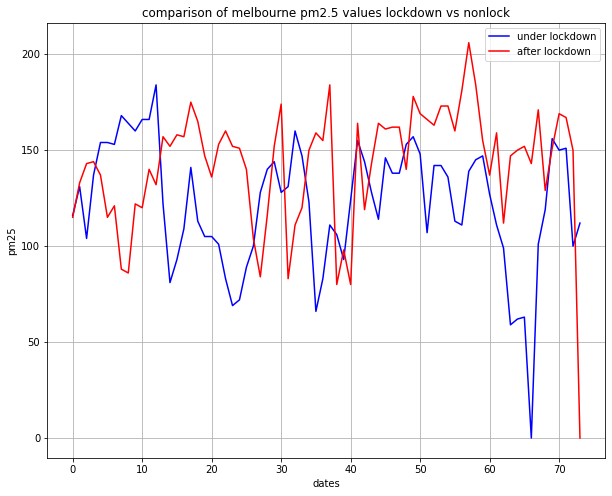

In [9]:
# variables,changes pm25 strings to interger
lockdown_dates=df_lockdown['date']
pm25=df_lockdown[' pm25']
pm25=[int(i) for i in pm25]
pm25_n=non_lockdown[' pm25']
pm25_n=[int(i) for i in pm25_n]
pm25_n
# co=df_lockdown[' co']
# co=[int(i) for i in co]
# co_n=non_lockdown[' co']
# co_n=[int(i) for i in co_n]

x_axis = np.arange(len(lockdown_dates))
plt.figure(figsize=(10,8))
plt.plot(x_axis,pm25,color ='blue',label='under lockdown')
plt.plot(x_axis,pm25_n,color ='red',label='after lockdown')
plt.legend()
plt.grid()
plt.xlabel('dates')
plt.ylabel('pm25')
plt.title('comparison of melbourne pm2.5 values lockdown vs nonlock')


NameError: name 'correlation' is not defined

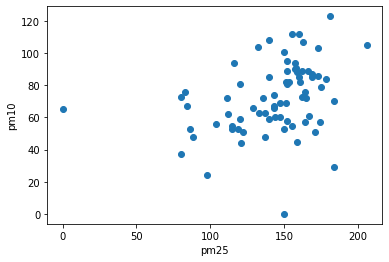

In [10]:
pm25= non_lockdown[' pm25']
pm25=[int(i) for i in pm25]
pm10 = non_lockdown[' pm10']
pm10=[int(i) for i in pm10]
plt.scatter(pm25,pm10)
plt.xlabel('pm25')
plt.ylabel('pm10')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()